# PILLS Snapshot Analysis

In this analysis, we examine smart contract balances for the PILLS ERC-20 token, LP with Spirit and Beets, and the 2 most recent Neo Pools.

These density plots show relative quantities, as the absolute balances vary per-contract.
The plots can be used to answer questions like: what is the amount that most addresses controlled for a given contract.

In [59]:
source("report-helpers.R")
df = read.csv('data/2022-04-20-pills-contracts.csv.gz', colClasses=c('address'='character'))
# head(df)

# do not pivot address; remove from list of names(df)
df_long = pivot_longer(df, all_of(names(df)[-1]), names_to="contract_state", values_to="amount")
# head(df_long)

df_neo_pools = df_long %>% filter(contract_state %in% c('neo_pool_0_amount', 'neo_pool_1_amount'))
# head(df_neo_pools)

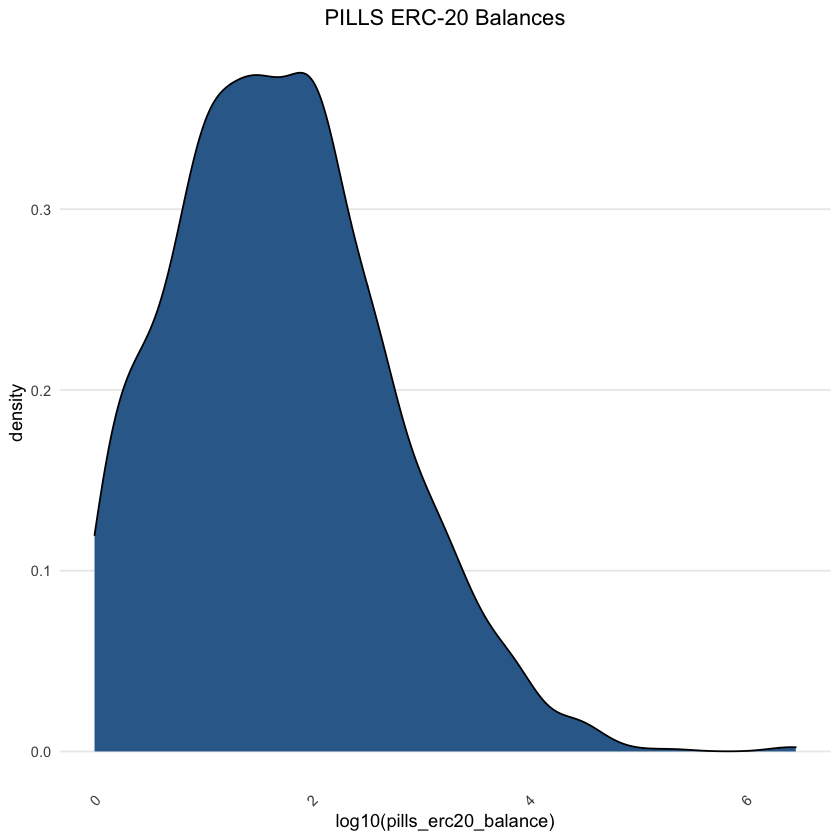

In [48]:
ggplot(data=df %>% filter(pills_erc20_balance>=1), aes(x=log10(pills_erc20_balance), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("PILLS ERC-20 Balances") +
    theme(legend.position="none")

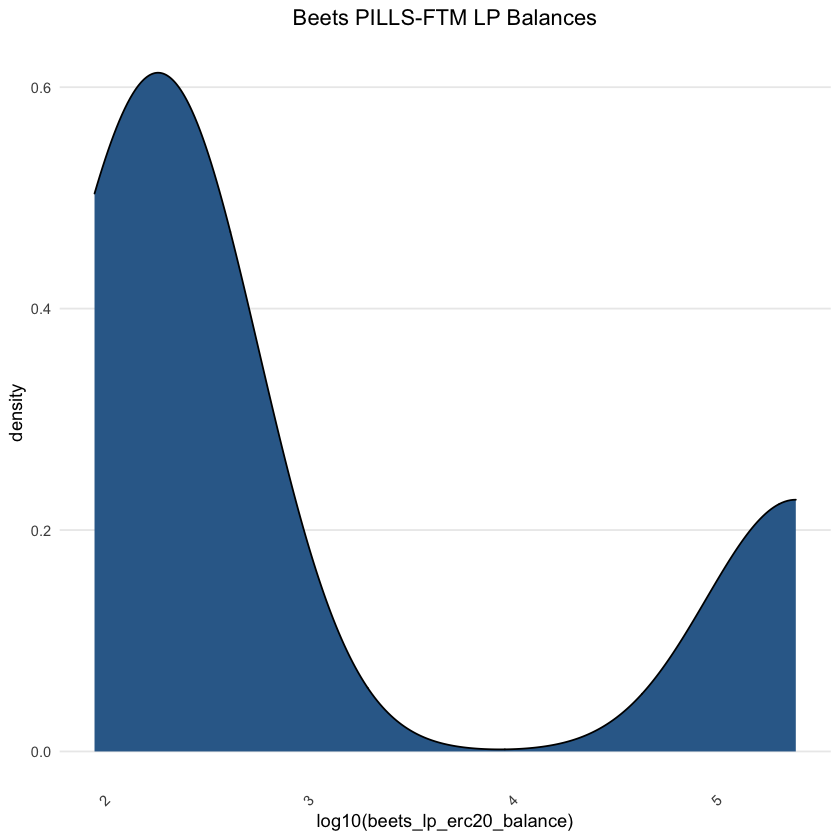

In [49]:
ggplot(data=df %>% filter(beets_lp_erc20_balance>=1), aes(x=log10(beets_lp_erc20_balance), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("Beets PILLS-FTM LP Balances") +
    theme(legend.position="none")

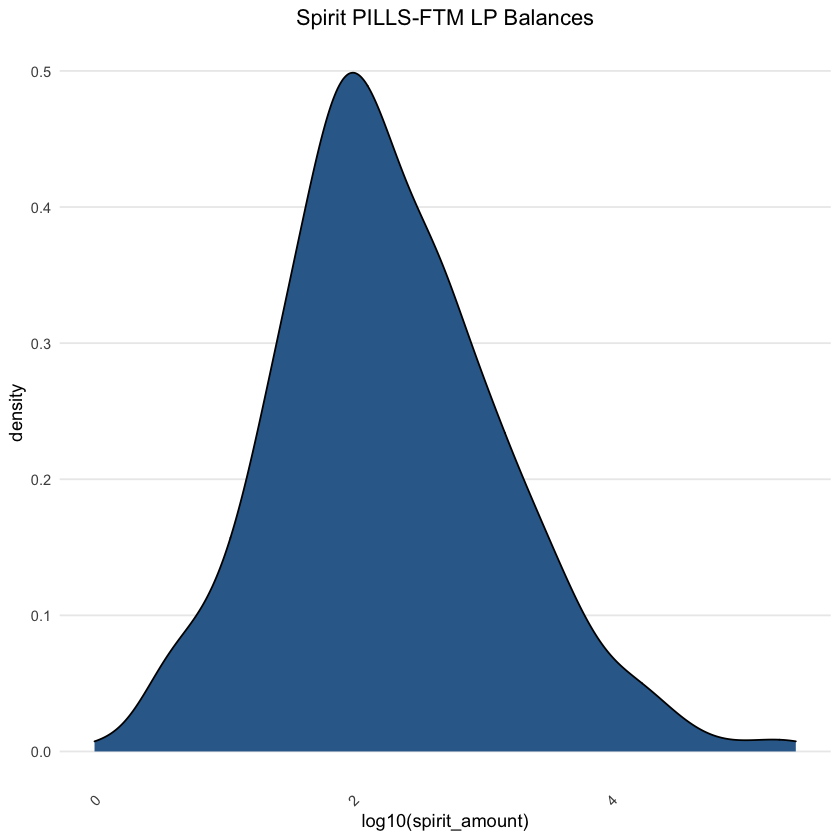

In [50]:
ggplot(data=df %>% filter(spirit_amount>=1), aes(x=log10(spirit_amount), fill=1)) +
    idm_theme +
    geom_density() +
    ggtitle("Spirit PILLS-FTM LP Balances") +
    theme(legend.position="none")

## Neo Pools

Since there are 2 Neo Pools to consider, the distributions are a little more interesting.
Looking at the relative densities are misleading in this case: the absolute quantity of PILLS is vastly different between the 2 pools.

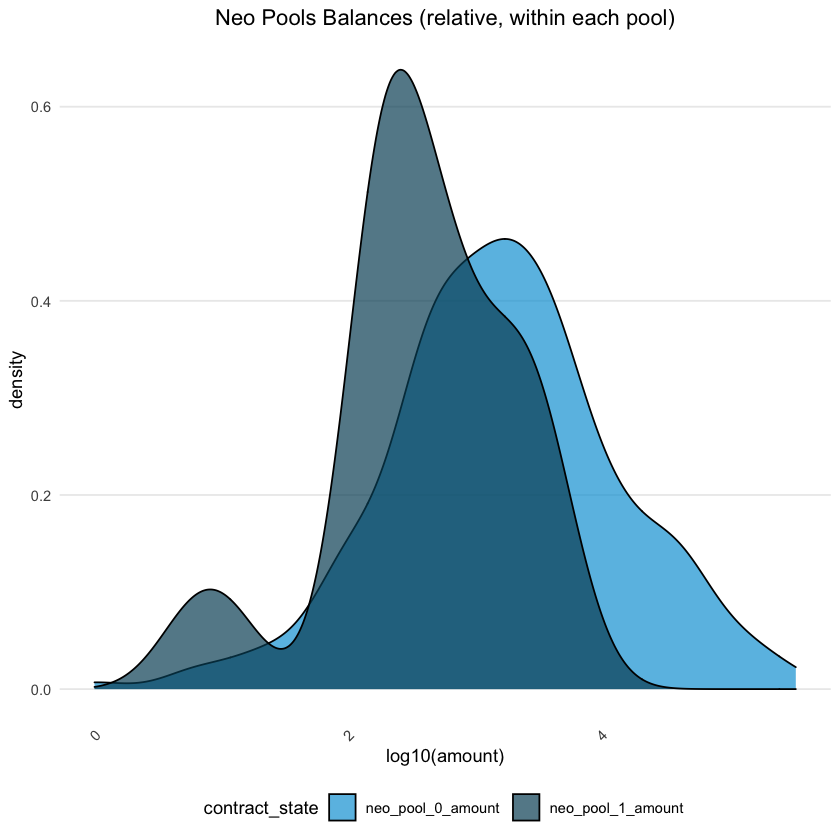

In [63]:
ggplot(data=df_neo_pools %>% filter(amount>=1), aes(x=log10(amount), fill=contract_state)) +
    geom_density(alpha=0.7) +
    idm_theme +
    scale_fill_economist() +
    ggtitle("Neo Pools Balances (relative, within each pool)")

The magnitude of the differences in PILLS volumes can be seen in this histogram, which shows the comparison in absolute terms.
We can see most of the volume was migrated to the Neo Pool that was current in April, 2022.

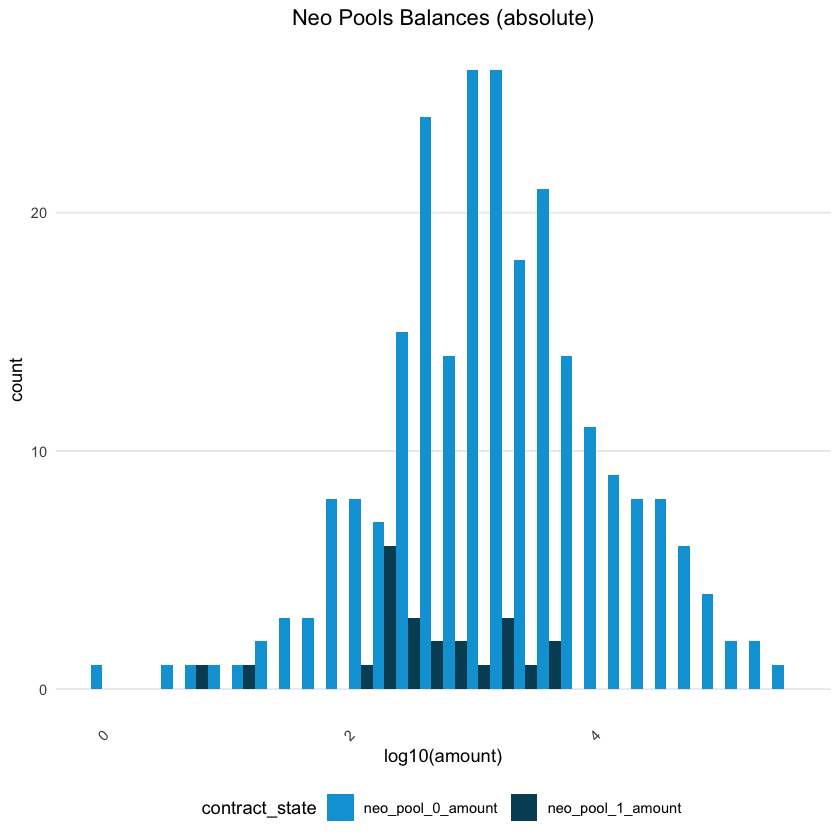

In [70]:
ggplot(data=df_neo_pools %>% filter(amount>=1), aes(x=log10(amount), fill=contract_state)) +
    geom_histogram(bins=30, position=position_dodge()) +
    idm_theme +
    scale_fill_economist() +
    ggtitle("Neo Pools Balances (absolute)")